### **Satisfaction Survey Analysis**

In [187]:
# 필요한 라이브러리 임포트

# 기본 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# ANOVA
from scipy import stats

# 요인분석
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
# 데이터 불러오기
df = pd.read_csv("../data/employee_survey.csv")
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


In [3]:
df.shape

(3025, 23)

In [4]:
df.isna().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

In [5]:
# 현재 직무 만족도
(df['JobSatisfaction'].mean()).round(2)

np.float64(3.39)

In [6]:
# 범주형 변수 파악
df.dtypes[df.dtypes == object]

Gender           object
MaritalStatus    object
JobLevel         object
Dept             object
EmpType          object
CommuteMode      object
EduLevel         object
dtype: object

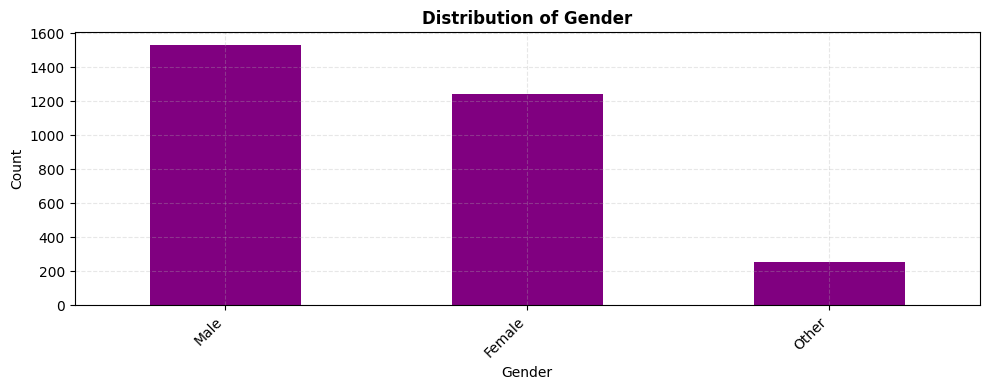

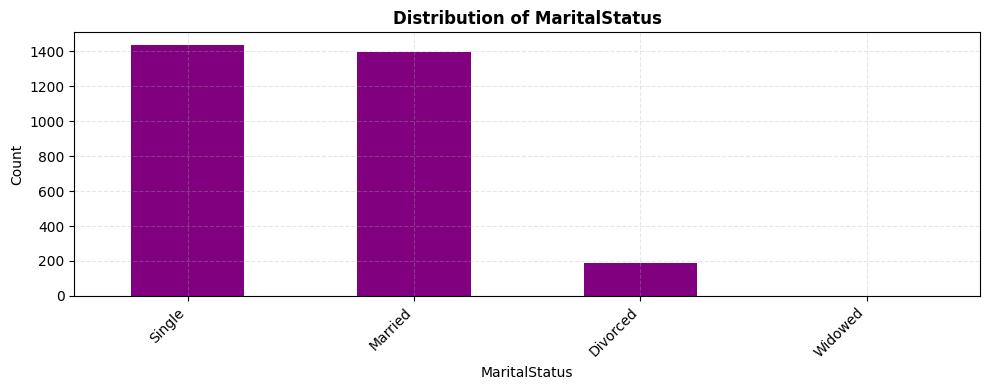

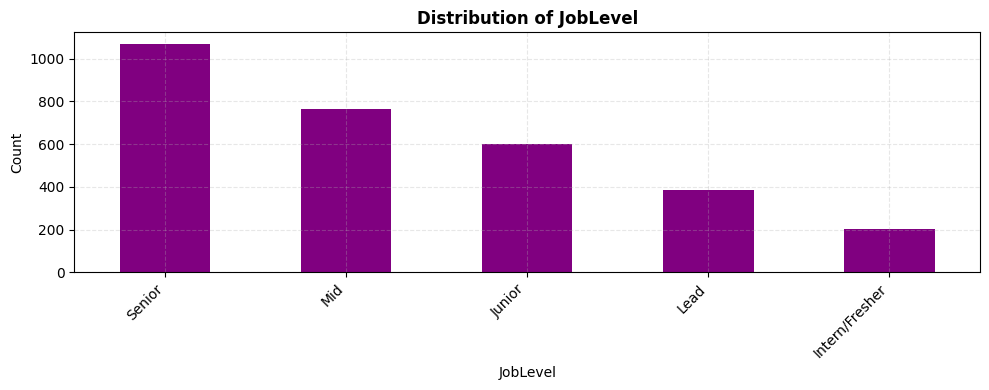

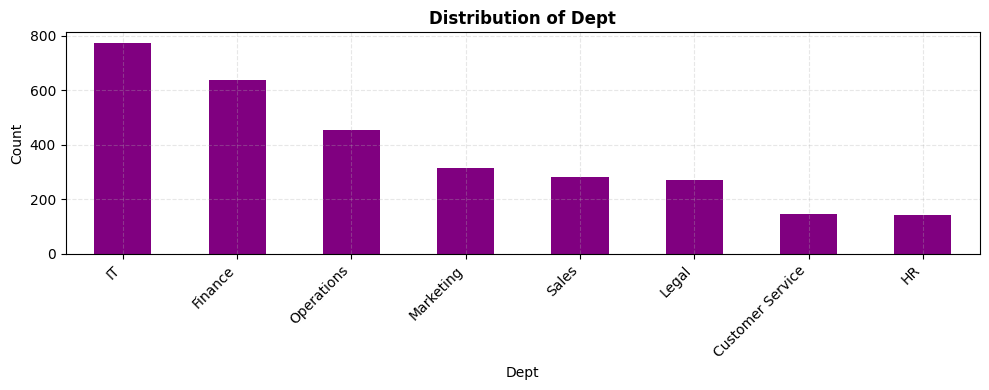

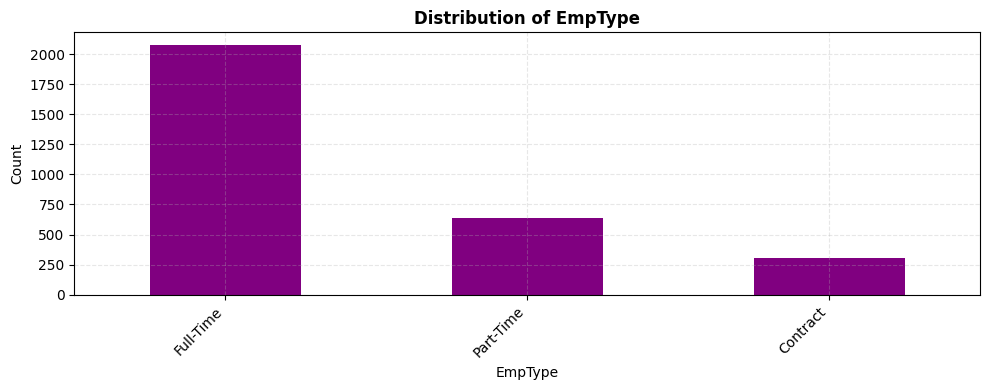

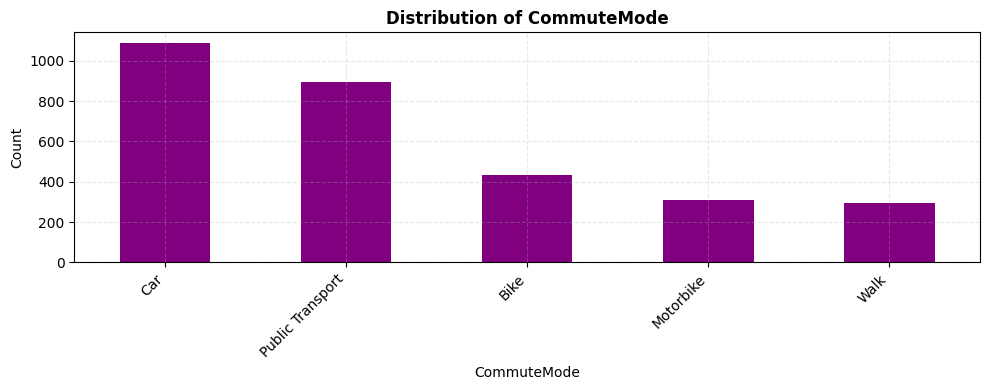

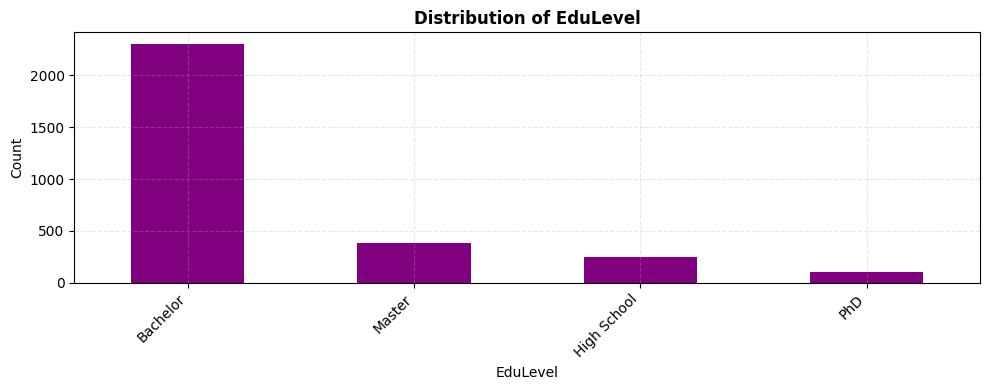

In [7]:
# 범주형 변수 분포 파악
categorical_vars = ["Gender", "MaritalStatus", "JobLevel", "Dept", "EmpType", "CommuteMode", "EduLevel"]

for c in categorical_vars:
    plt.figure(figsize = (10, 4))
    df[c].value_counts().plot(kind = 'bar', color = 'purple')
    plt.title(f"Distribution of {c}", fontweight = 'bold')
    plt.ylabel("Count")
    plt.xlabel(c)
    plt.xticks(rotation = 45, ha = "right")
    plt.tight_layout()
    plt.grid(True, alpha = 0.3, linestyle = "--")
    plt.show()

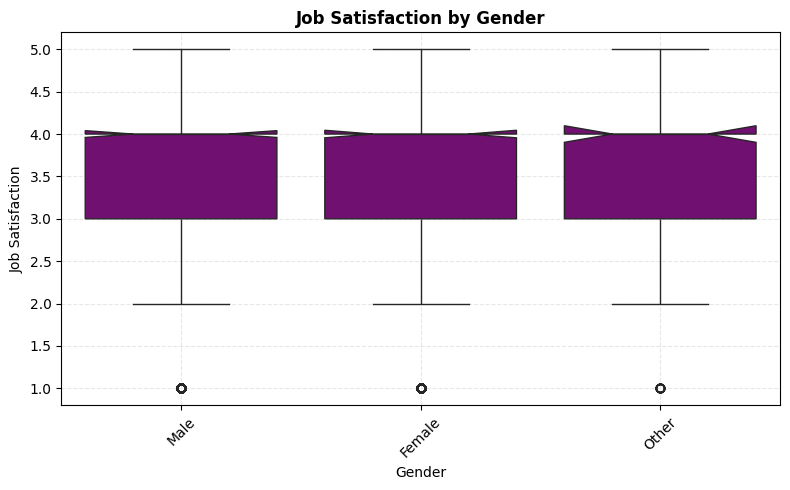

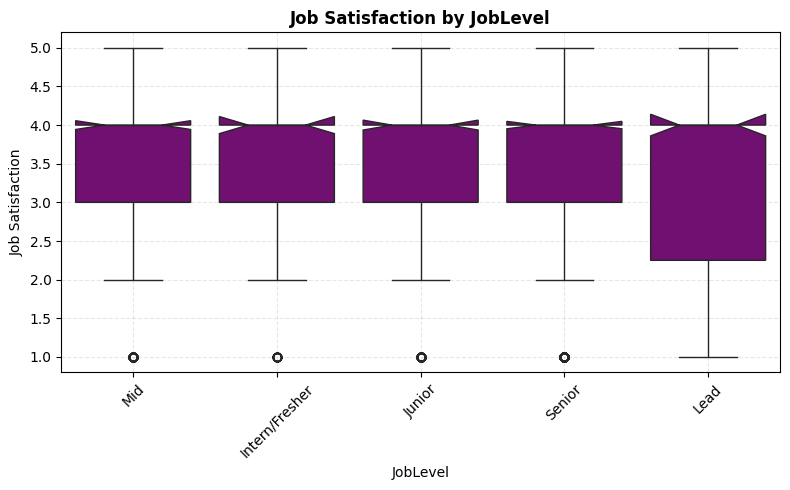

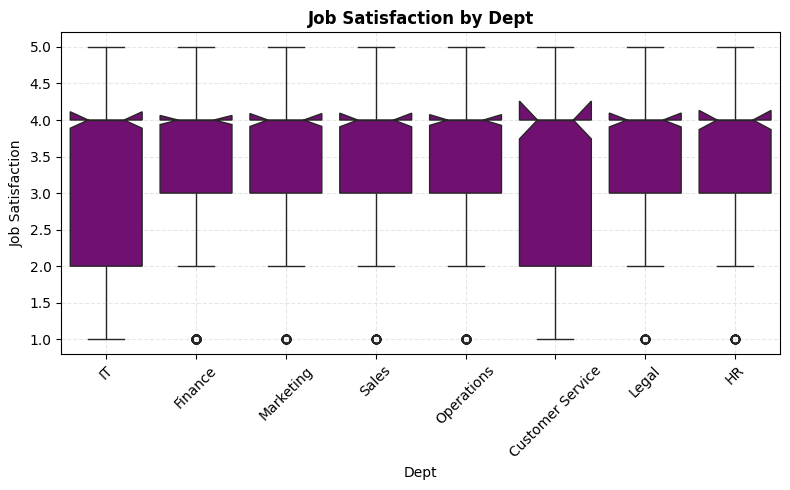

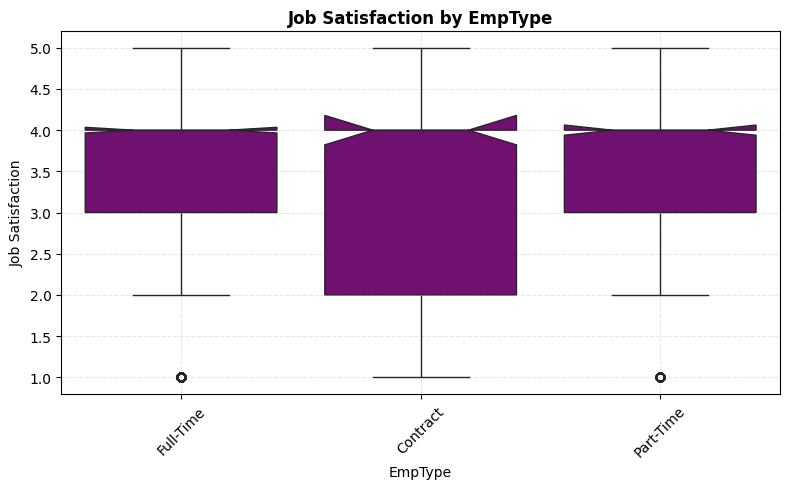

In [ ]:
# 범주형 변수와 직무 만족도 간의 연관성 파악

categorical_vars2 = ["Gender", "JobLevel", "Dept", "EmpType"]

for v in categorical_vars2:
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = v, y = "JobSatisfaction", data = df, color = 'purple', notch = True)
    plt.title(f"Job Satisfaction by {v}", fontweight = 'bold')
    plt.xlabel(v)
    plt.ylabel("Job Satisfaction")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.grid(True, alpha = 0.3, linestyle = "--")
    plt.show()
    

In [8]:
# 범주형이 아닌 변수 파악
df.dtypes[df.dtypes != object]

EmpID                      int64
Age                        int64
Experience                 int64
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
dtype: object

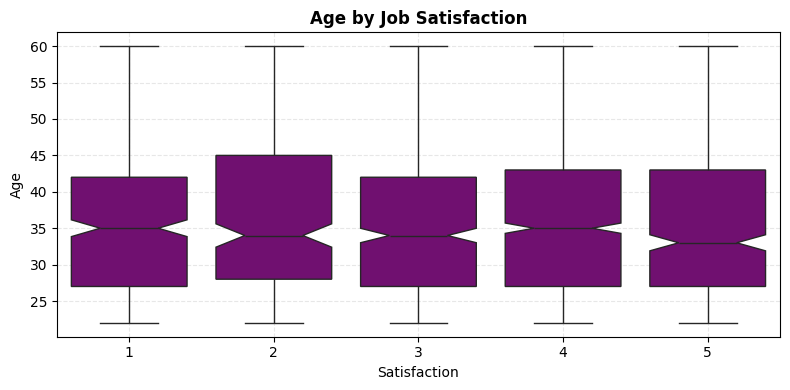

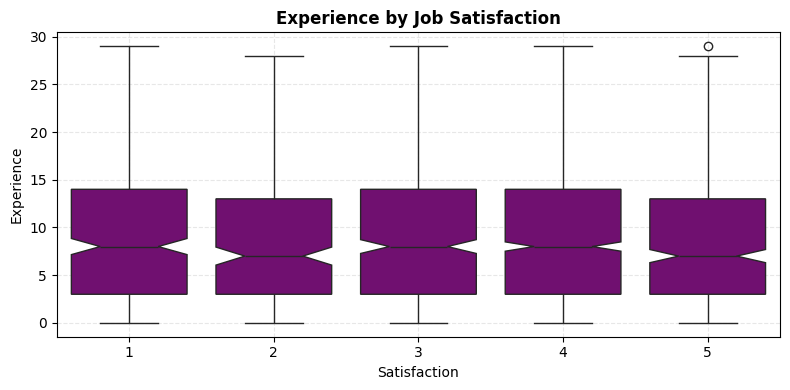

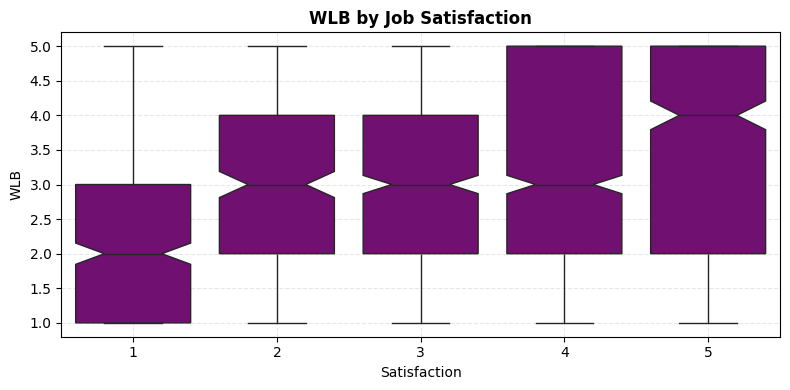

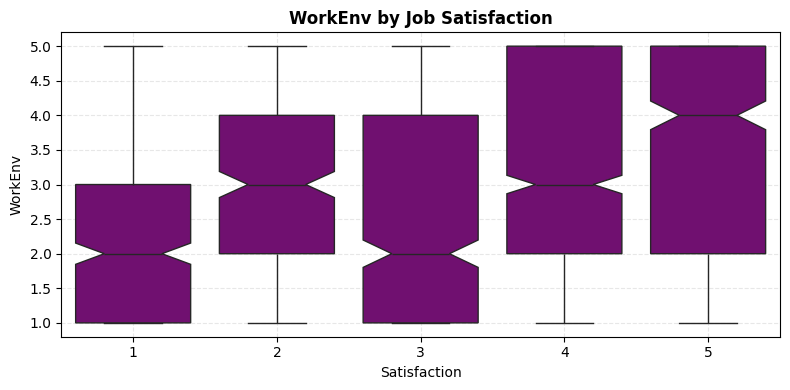

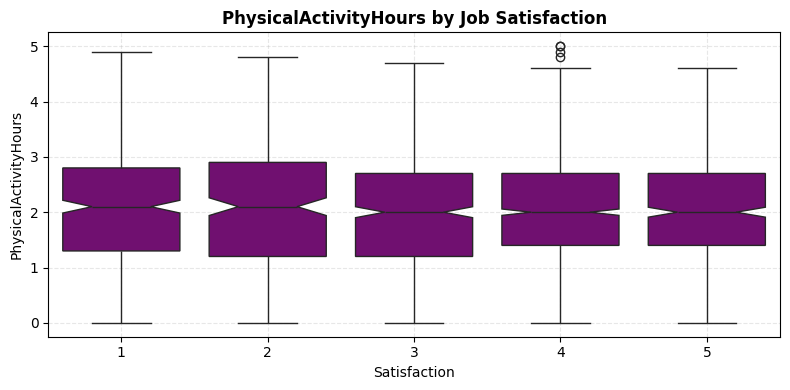

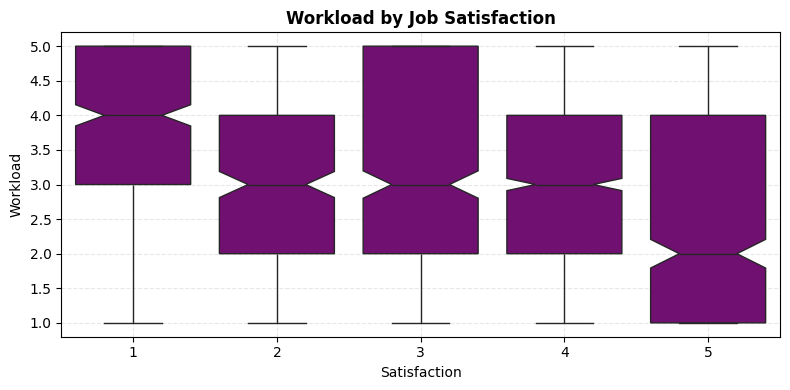

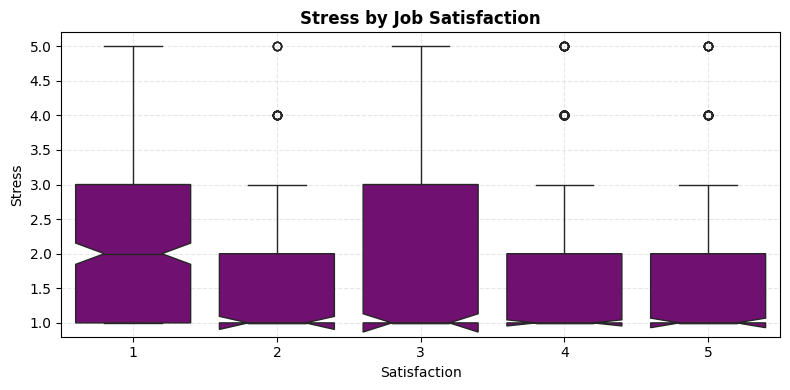

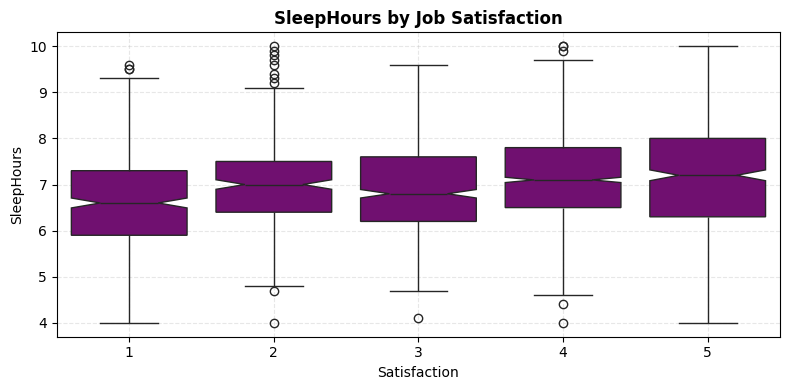

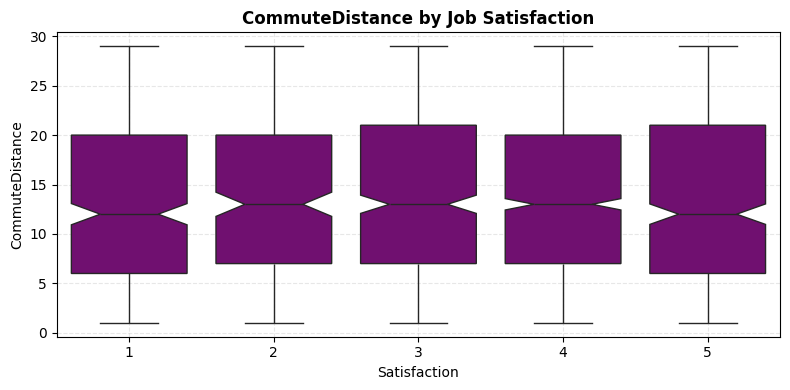

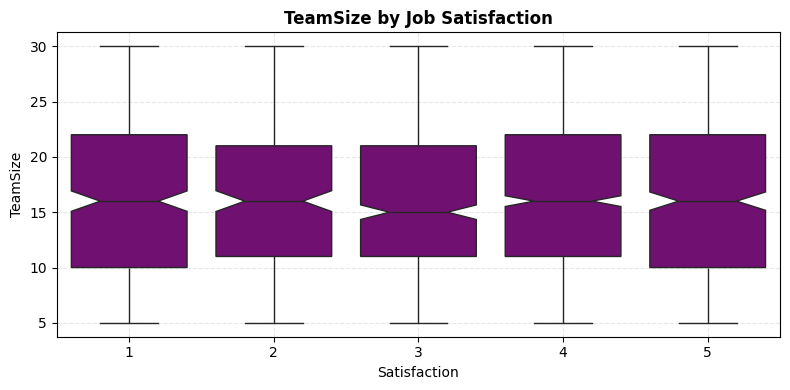

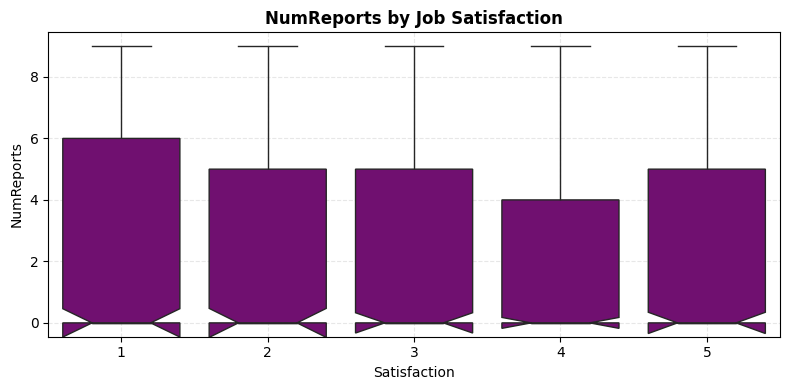

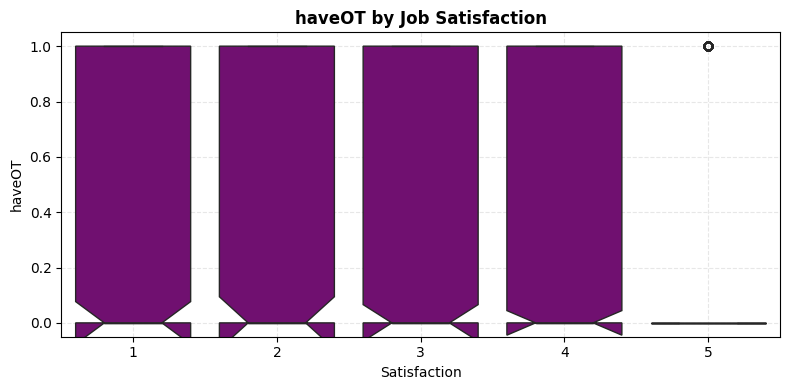

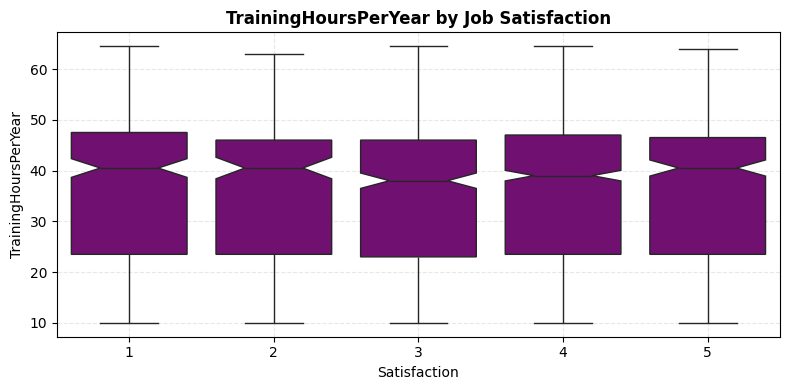

In [13]:
# 여러 변수별 직무 만족도 파악

for f in ["Age", "Experience", "WLB", "WorkEnv", "PhysicalActivityHours", "Workload", "Stress", "SleepHours", "CommuteDistance", "TeamSize", "NumReports", "haveOT", "TrainingHoursPerYear"]:
    plt.figure(figsize = (8, 4))
    sns.boxplot(x = "JobSatisfaction", y = f, data = df, color = "purple", notch = True)
    plt.title(f"{f} by Job Satisfaction", fontweight = "bold")
    plt.xlabel("Satisfaction")
    plt.ylabel(f)
    plt.tight_layout()
    plt.grid(True, alpha = 0.3, linestyle = "--")
    plt.show()

In [ ]:
# 직업 만족도와 연관있는 변수 검증
anova_results = {}

for var in ["Age", "Experience", "WLB", "WorkEnv", "PhysicalActivityHours", "Workload", "Stress", "SleepHours", "CommuteDistance", "TeamSize", "NumReports", "haveOT", "TrainingHoursPerYear"]:
    groups = [group["JobSatisfaction"].dropna() for _, group in df.groupby(var)]
    if len(groups) > 1:
        f_val, p_val = stats.f_oneway(*groups)
        anova_results[var] = {"F-value": f_val, "p-value": p_val}

anova_df = pd.DataFrame(anova_results).T
anova_df["significant"] = anova_df["p-value"] < 0.05
anova_df = anova_df.sort_values(by="p-value")

anova_df

,F-value,p-value,significant
WLB,54.756385,1.253347e-44,True
Workload,53.981282,5.252591e-44,True
WorkEnv,50.242999,5.356750e-41,True
Stress,36.805129,4.351696e-30,True
haveOT,71.568144,4.111897e-17,True
SleepHours,3.232653,3.654359e-15,True
PhysicalActivityHours,1.206235,1.532610e-01,False
NumReports,1.365263,1.981599e-01,False
Experience,1.137817,2.791971e-01,False
Age,0.985857,4.945495e-01,False


### 요인분석

In [196]:
features = ["Age", "Experience", "WLB", "WorkEnv", "PhysicalActivityHours", "Workload", "Stress", "SleepHours", "CommuteDistance", "TeamSize", "NumReports", "haveOT", "TrainingHoursPerYear", 'JobSatisfaction']
X = df[features]
kmo_all,kmo_model=calculate_kmo(X)
print("KMO:", kmo_model.round(2))

KMO: 0.71


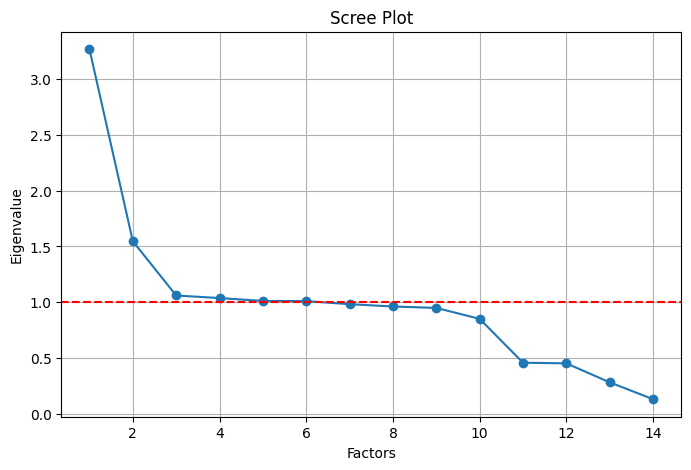

In [ ]:
# FactorAnalyzer로 고유값 계산
fa = FactorAnalyzer(rotation = None)
fa.fit(X)

# 고유값 추출
ev, v = fa.get_eigenvalues()

# 스크리 플롯
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ev) + 1), ev, marker = 'o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1, color='red', linestyle='--')  # 카이저 기준선 (eigenvalue > 1)
plt.grid(True)
plt.show()

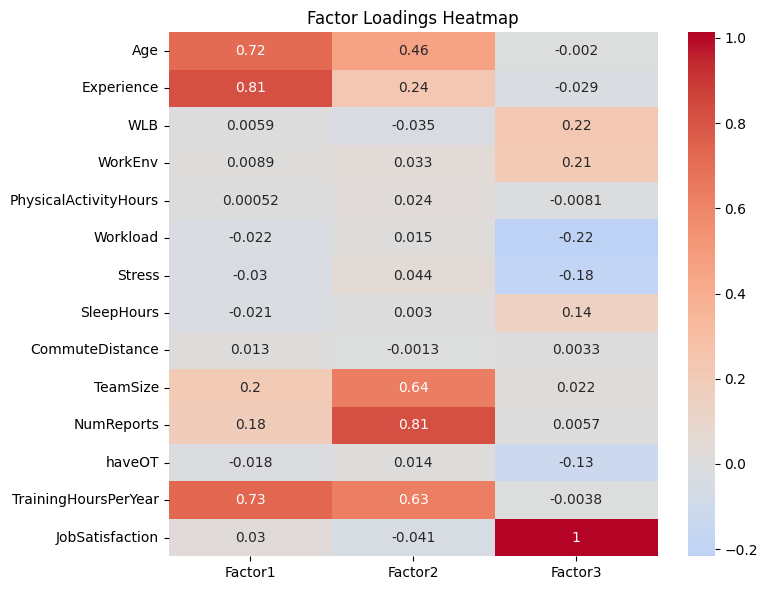

In [225]:
# 1. 요인 분석 실행
fa = FactorAnalyzer(n_factors = 3, rotation = 'varimax')
fa.fit(df[features])  # features는 예: ['WLB', 'Workload', ...]

# 2. 요인 로딩 데이터프레임 생성
loadings = pd.DataFrame(fa.loadings_, 
                        index=features, 
                        columns=['Factor1', 'Factor2', 'Factor3'])

# 3. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings Heatmap')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()